<p><h1><b><font color="Magenta">Regression</p>

<p><h1><b><font color='DarkBlue'>Context</b></h1></p>

This dataset is about the Wind Turbines Power generation.In Wind Turbines, Scada Systems measure and save data's like wind speed, wind direction and generated power etc. for 10 mins intervals.This file was taken from wind turbine's scada system that is working Turkey.

Dataset Link :-https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset
<p><h1><b><font color='DarkBlue'>Content</b></h1></p>
The data's in the file are:

- Date/Time : for 10 mins interval
- LV ActivePower (kW): The Power generated for the moment
- Wind Speed (m/s):  The wind speed at the hub height of turbine, wind speed is use for power generation
- Theoretical_Power_Curve (KWh): The theoretical power values that the turbine generated with that wind speed
- Wind Direction (°): The wind directon at the hub height of the turbine

# Wind Turbine Dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Read dataset into pandas dataframe
df = pd.read_csv("T1.csv",parse_dates=['Date/Time'])
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [4]:
df.nunique()

Date/Time                        50530
LV ActivePower (kW)              38764
Wind Speed (m/s)                 50305
Theoretical_Power_Curve (KWh)    37157
Wind Direction (°)               50251
dtype: int64

In [5]:
df.shape

(50530, 5)

In [6]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [7]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [8]:
#spilt Date/Time column into year,month,day column.
df['year'] = df['Date/Time'].dt.year 
df['month'] = df['Date/Time'].dt.month 
df['day'] = df['Date/Time'].dt.day 
df = df.drop(['Date/Time'], axis=1)  #Drop Date/Time column
df.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),year,month,day
0,380.047791,5.311336,416.328908,259.994904,2018,1,1
1,453.769196,5.672167,519.917511,268.641113,2018,1,1
2,306.376587,5.216037,390.900016,272.564789,2018,1,1
3,419.645905,5.659674,516.127569,271.258087,2018,1,1
4,380.650696,5.577941,491.702972,265.674286,2018,1,1


<AxesSubplot:xlabel='LV ActivePower (kW)', ylabel='Density'>

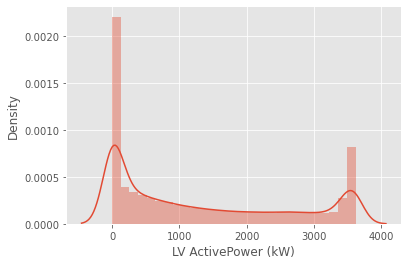

In [9]:
sns.distplot(df["LV ActivePower (kW)"])

<AxesSubplot:xlabel='Theoretical_Power_Curve (KWh)', ylabel='Density'>

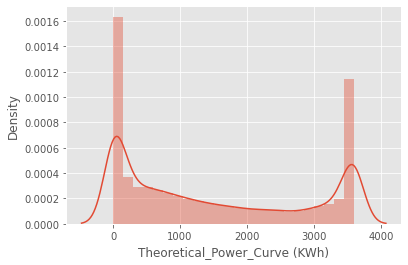

In [10]:
sns.distplot(df["Theoretical_Power_Curve (KWh)"])

<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='Density'>

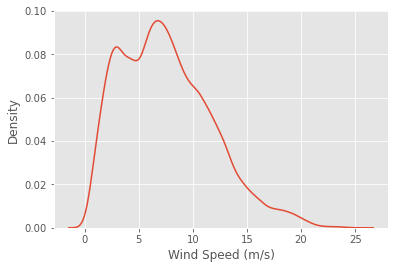

In [11]:
sns.kdeplot(df["Wind Speed (m/s)"])

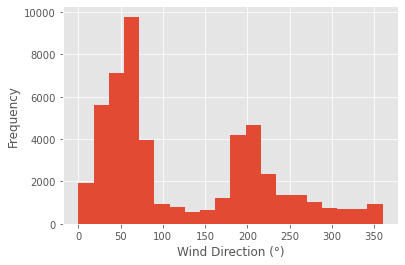

In [12]:
plt.hist(df["Wind Direction (°)"], bins=20)
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'LV ActivePower (kW)')

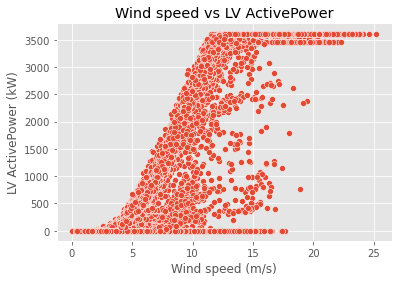

In [13]:
#Graph of LV Active power vs Wind speed
sns.scatterplot(df["Wind Speed (m/s)"],df["LV ActivePower (kW)"])
plt.title("Wind speed vs LV ActivePower")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("LV ActivePower (kW)")

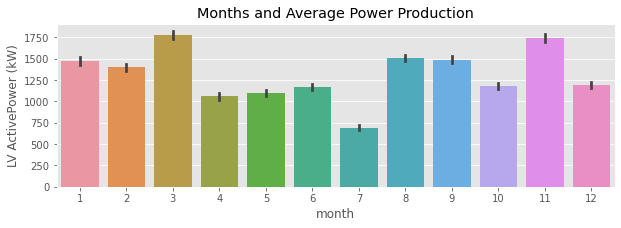

In [14]:
plt.figure(figsize=(10,3))
sns.barplot(x=df['month'], y=df["LV ActivePower (kW)"], data=df)
plt.title('Months and Average Power Production');

- From above graph we can see that March and November months have heightest Active Power production

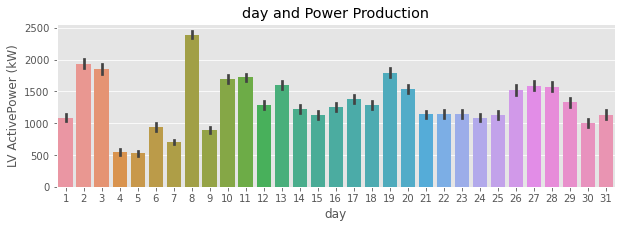

In [15]:
plt.figure(figsize=(10,3))
sns.barplot(x=df['day'], y=df["LV ActivePower (kW)"], data=df)
plt.title('day and Power Production');

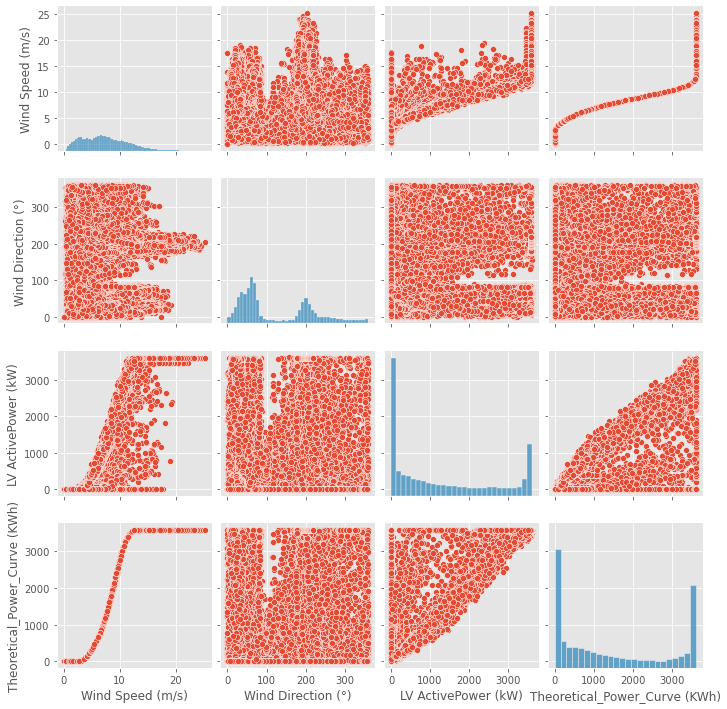

In [16]:
#plot graph of the selected coulmns
sns.pairplot(data=df, vars=["Wind Speed (m/s)", "Wind Direction (°)", "LV ActivePower (kW)", "Theoretical_Power_Curve (KWh)"])
plt.show()

array([[<AxesSubplot:title={'center':'LV ActivePower (kW)'}>,
        <AxesSubplot:title={'center':'Wind Speed (m/s)'}>,
        <AxesSubplot:title={'center':'Theoretical_Power_Curve (KWh)'}>],
       [<AxesSubplot:title={'center':'Wind Direction (°)'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

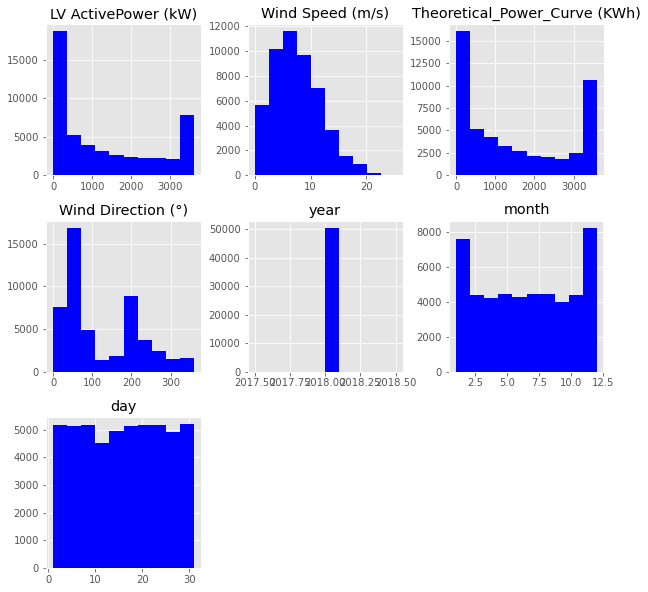

In [17]:
df.hist(figsize=(10,10),color='blue')

### HeatMap of Correlation

<AxesSubplot:>

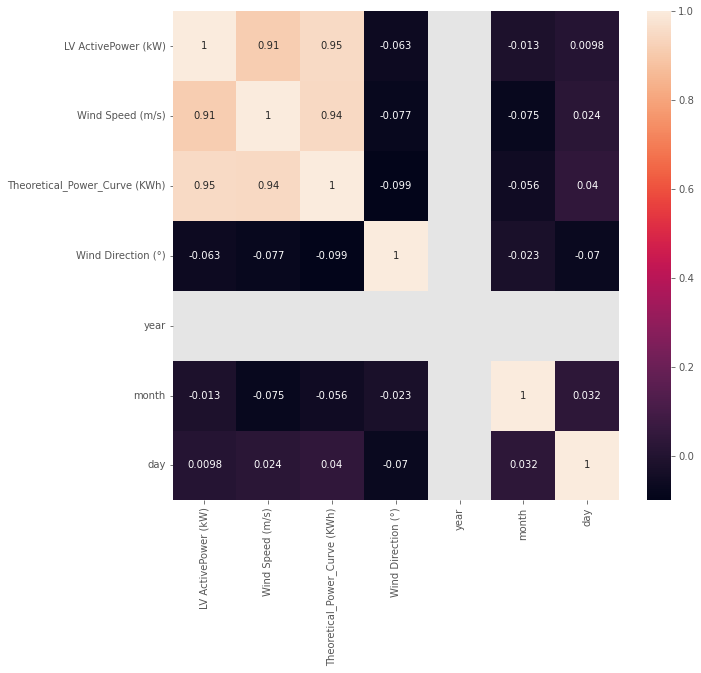

In [18]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True)

- From above graphs and heat map it is clear that "year" column have the least correlation, So we can exclude it from the consideration.

### Steps to findout the outliers

<AxesSubplot:xlabel='Wind Direction (°)'>

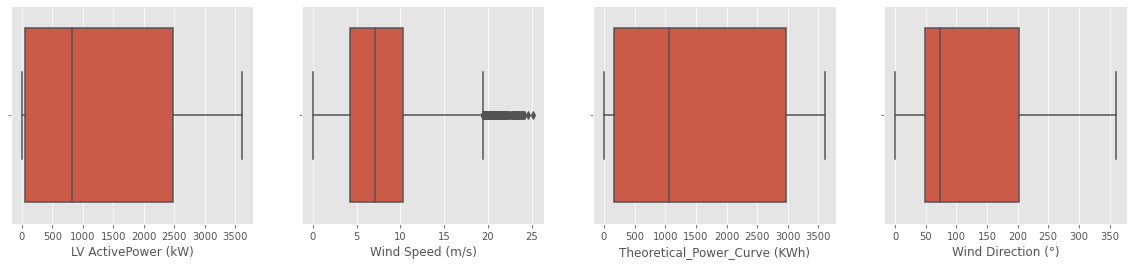

In [19]:
#Plot boxplot to findout if thier are outliers or not
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.boxplot(df["LV ActivePower (kW)"])
plt.subplot(1,4,2)
sns.boxplot(df["Wind Speed (m/s)"])
plt.subplot(1,4,3)
sns.boxplot(df["Theoretical_Power_Curve (KWh)"])
plt.subplot(1,4,4)
sns.boxplot(df["Wind Direction (°)"])

- From above plots it is clear that Their are outliers in the "wind speed",only few datapoints have wind speed appriximately greater than 19 m/s, Now remove the outliers in wind speed data

In [20]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),year,month,day
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.0,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559,2018.0,6.565110,15.569602
std,1312.459242,4.227166,1368.018238,93.443736,0.0,3.395372,8.756904
min,-2.471405,0.000000,0.000000,0.000000,2018.0,1.000000,1.000000
25%,50.677890,4.201395,161.328167,49.315437,2018.0,4.000000,8.000000
50%,825.838074,7.104594,1063.776283,73.712978,2018.0,7.000000,16.000000
75%,2482.507568,10.300020,2964.972462,201.696720,2018.0,10.000000,23.000000
max,3618.732910,25.206011,3600.000000,359.997589,2018.0,12.000000,31.000000


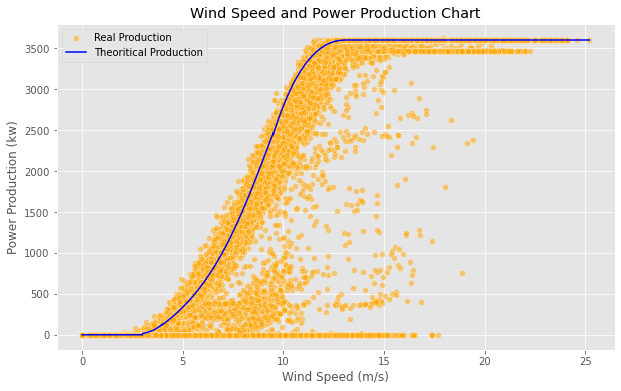

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Wind Speed (m/s)", y="LV ActivePower (kW)", color='orange', label='Real Production', alpha=0.5, data=df)
sns.lineplot(x="Wind Speed (m/s)", y="Theoretical_Power_Curve (KWh)", color='blue', label='Theoritical Production', data=df)
plt.title('Wind Speed and Power Production Chart')
plt.ylabel('Power Production (kw)');

- From above graph it is clear that their is Zero-power production for wind speed approximately less than 3 m/s.
- From above describtion it is found that Lv ActivePower have minimum value in negative ,so we have to remove it.

### Steps To Remove Outliers

In [22]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print(len(out))

iqr_outliers(df['LV ActivePower (kW)'])
iqr_outliers(df['Theoretical_Power_Curve (KWh)'])
iqr_outliers(df['Wind Direction (°)'])

0
0
0


In [23]:
df=df[df["LV ActivePower (kW)"]>0]    #Remove Zero-power production data
df=df[df["Wind Speed (m/s)"]>3]
df=df[df["Wind Speed (m/s)"]<=18.5]  #Remove outliers in wind speed

In [24]:
df.shape

(38500, 7)

In [25]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),year,month,day
count,38500.000000,38500.000000,38500.000000,38500.000000,38500.0,38500.000000,38500.000000
mean,1645.243341,8.615044,1814.670833,113.476461,2018.0,6.651091,15.712260
std,1243.089986,3.428061,1288.391974,86.164433,0.0,3.326646,8.552924
min,0.028733,3.002270,16.073052,0.000000,2018.0,1.000000,1.000000
25%,490.045692,5.945865,606.878382,48.272504,2018.0,4.000000,8.000000
50%,1373.824463,8.071751,1571.349207,69.151783,2018.0,7.000000,16.000000
75%,2831.049255,10.938993,3250.474214,196.580227,2018.0,10.000000,23.000000
max,3618.732910,18.497280,3600.000000,359.997589,2018.0,12.000000,31.000000


<AxesSubplot:xlabel='Wind Speed (m/s)'>

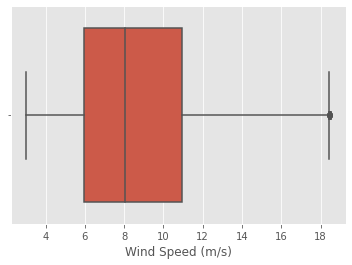

In [26]:
plt.figure()
sns.boxplot(df['Wind Speed (m/s)'])

<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

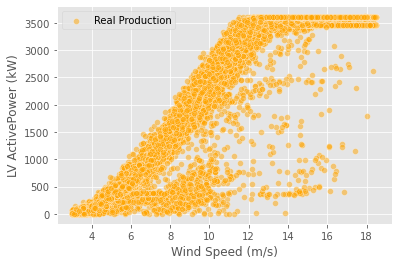

In [27]:
plt.figure()
sns.scatterplot(x="Wind Speed (m/s)", y="LV ActivePower (kW)", color='orange', label='Real Production', alpha=0.5, data=df)

# -------------------------------------------------------------------------------------

## Split the data

In [28]:
cols=["Wind Speed (m/s)","Wind Direction (°)","Theoretical_Power_Curve (KWh)","month","day",]
X=df[cols]
Y=df[["LV ActivePower (kW)"]]

In [29]:
X.head()

,Wind Speed (m/s),Wind Direction (°),Theoretical_Power_Curve (KWh),month,day
0,5.311336,259.994904,416.328908,1,1
1,5.672167,268.641113,519.917511,1,1
2,5.216037,272.564789,390.900016,1,1
3,5.659674,271.258087,516.127569,1,1
4,5.577941,265.674286,491.702972,1,1


In [30]:
Y.head()

,LV ActivePower (kW)
0,380.047791
1,453.769196
2,306.376587
3,419.645905
4,380.650696


In [31]:
print('Independent features shape : ', X.shape)
print('Dependent feature shape    : ', Y.shape)

Independent features shape :  (38500, 5)
Dependent feature shape    :  (38500, 1)


In [32]:
#import train_test_split to split data into train test columns 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [33]:
#Shape of the train and test data
print('Training Data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training Data Shape   :  (26950, 5)
Training labels Shape :  (26950, 1)
Testing Data shape    :  (11550, 5)
Testing labels shape  :  (11550, 1)


<p><h1><b><font color="Magenta"> Model creation</b></h2></p>

<p><h2><font color="darkblue">Simple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression                  
Lr_regressor = LinearRegression()
Lr_regressor.fit(x_train, y_train)

print('Training Set Score : ', Lr_regressor.score(x_train, y_train))
print('Testng Set Score   : ', Lr_regressor.score(x_test, y_test))

Lr_y_pred = Lr_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, Lr_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, Lr_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, Lr_y_pred)))

Training Set Score :  0.9499245210934096
Testng Set Score   :  0.9536870952674128

Mean Absolute Error      :  138.14451030125196
Mean Squared  Error      :  72828.74109459178
Root Mean Squared  Error :  269.8680068007169


<p><h2><font color="darkblue">Lasso

In [35]:
from sklearn.linear_model import Lasso
L_regressor = Lasso(alpha = 1)
L_regressor.fit(x_train, y_train)

print('Training Set Score : ', L_regressor.score(x_train, y_train))
print('Testng Set Score   : ', L_regressor.score(x_test, y_test))

L_y_pred = L_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, L_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, L_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, L_y_pred)))

Training Set Score :  0.9499238878695213
Testng Set Score   :  0.9536808193359401

Mean Absolute Error      :  138.1093992878204
Mean Squared  Error      :  72838.61022698574
Root Mean Squared  Error :  269.88629129132465


<p><h2><font color="darkblue">Ridge

In [36]:
from sklearn.linear_model import Ridge
R_regressor = Ridge(alpha = 1)
R_regressor.fit(x_train, y_train)

print('Training Set Score : ', R_regressor.score(x_train, y_train))
print('Testng Set Score   : ', R_regressor.score(x_test, y_test))

R_y_pred = R_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, R_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, R_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, R_y_pred)))

Training Set Score :  0.9499245210893297
Testng Set Score   :  0.9536870855218452

Mean Absolute Error      :  138.14447276112517
Mean Squared  Error      :  72828.75641985406
Root Mean Squared  Error :  269.8680351947115


<p><h2><font color="darkblue">KNeighboursRegressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
Kn_regressor = KNeighborsRegressor(n_neighbors = 5)
Kn_regressor.fit(x_train, y_train)

print('Training Set Score : ', Kn_regressor.score(x_train, y_train))
print('Testng Set Score   : ', Kn_regressor.score(x_test, y_test))

Kn_y_pred = Kn_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, Kn_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, Kn_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, Kn_y_pred)))

Training Set Score :  0.9744723687097081
Testng Set Score   :  0.9644729997438798

Mean Absolute Error      :  110.85488774255082
Mean Squared  Error      :  55867.510760989055
Root Mean Squared  Error :  236.3630909448196


<p><h2><font color="darkblue">DecissionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
Dt_regressor = DecisionTreeRegressor()
Dt_regressor.fit(x_train,y_train)

Dt_y_pred = Dt_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, Dt_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, Dt_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, Dt_y_pred)))


Mean Absolute Error      :  102.46558435308975
Mean Squared  Error      :  60120.82053841383
Root Mean Squared  Error :  245.19547413933608


<p><h2><font color="darkblue">Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
Rf_regressor = RandomForestRegressor(n_estimators = 50, max_depth = 5)
Rf_regressor.fit(x_train, y_train)

print('Training Set Score : ', Rf_regressor.score(x_train, y_train))
print('Testng Set Score   : ', Rf_regressor.score(x_test, y_test))

Rf_y_pred = Rf_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, Rf_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, Rf_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, Rf_y_pred)))

Training Set Score :  0.9654036020563643
Testng Set Score   :  0.9659569458192125

Mean Absolute Error      :  113.15736493647867
Mean Squared  Error      :  53533.951137752825
Root Mean Squared  Error :  231.37405026872142


<p><h2><font color="darkblue">XGB Regressor

In [40]:
from xgboost import XGBRegressor
Xg_regressor = XGBRegressor(n_estimators = 50, max_depth = 5)
Xg_regressor.fit(x_train, y_train)

print('Training Set Score : ', Xg_regressor.score(x_train, y_train))
print('Testng Set Score   : ', Xg_regressor.score(x_test, y_test))

Xg_y_pred = Xg_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, Xg_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, Xg_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, Xg_y_pred)))

Training Set Score :  0.9882384433702904
Testng Set Score   :  0.9853123089626864

Mean Absolute Error      :  76.34830903633761
Mean Squared  Error      :  23096.93278817826
Root Mean Squared  Error :  151.97675081465013


<p><h2><font color="darkblue">LGBM Regressor

In [41]:
from lightgbm import LGBMRegressor
Lgb_regressor = LGBMRegressor(n_estimators = 50, max_depth = 5)
Lgb_regressor.fit(x_train, y_train)

print('Training Set Score : ', Lgb_regressor.score(x_train, y_train))
print('Testng Set Score   : ', Lgb_regressor.score(x_test, y_test))

LGB_y_pred = Lgb_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, LGB_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, LGB_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, LGB_y_pred)))

Training Set Score :  0.9779098207395868
Testng Set Score   :  0.9771387467795732

Mean Absolute Error      :  95.6145141805082
Mean Squared  Error      :  35950.1590647768
Root Mean Squared  Error :  189.60527172200884


<p><h2><font color="darkblue">AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=20,learning_rate=0.5)
ada.fit(x_train , y_train)

print('Training Set Score : ', ada.score(x_train, y_train))
print('Testng Set Score   : ', ada.score(x_test, y_test))

ada_y_pred = Lgb_regressor.predict(x_test)

print()
print('Mean Absolute Error      : ', mean_absolute_error(y_test, ada_y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, ada_y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, ada_y_pred)))

Training Set Score :  0.9395783964956603
Testng Set Score   :  0.9404804754204187

Mean Absolute Error      :  95.6145141805082
Mean Squared  Error      :  35950.1590647768
Root Mean Squared  Error :  189.60527172200884


<p><h2><b><font color="Magenta">Conclusion :</h2></p>

<p><font size=3, line_spce=1.5> In this notebook, We explored how to build different regression models to predict the energy generation of a wind Turbine. For doing this, First imported the necessary libraries, then loaded and cleaned the data, and prepared it for modeling.Then,splitted the data into training and test sets, built the models, and evaluated its performance on the test set using maen absolute error,mean squared error and Root mean squared error.</p>